In [1]:
# Code to plot the HI Mass as a function of Halo Mass (Mvir)
# First off, import the packages we need
import numpy as np  # work horse package for numerical work in python
import matplotlib.pyplot as plt  # plotting library
from dragons import meraxes, munge
import random
import sys
from Functions import *

#get gals, snaps, sims_props
snapshot_used = 250 # z = 0
gals, sim_props, snaplist = get_gal_catalogue(snapshot_used)

snaplist_index_used = list(snaplist[0]).index(snapshot_used)# convert to list and find the index of the snap we are using
redshift_used = snaplist[1][snaplist_index_used] # Get the redshift for corresponding snapshot
redshift_used = round(redshift_used, 1) # round float to nearest whole int
redshift_used = str(redshift_used)

# Take a random sample of gals (k = 10^4)
gals_ran = Random_Sample_Gals(gals, 10000)
#gals_ran.shape

In [2]:
# Log the masses 
HIMass = np.log10(gals_ran["HIMass"]*1e10)
print('HIMass: ', HIMass, 'no. items: ', HIMass.shape)
Mvir = np.log10(gals_ran["Mvir"]*1e10)
print('Mvir: ', Mvir, 'no. items: ', HIMass.shape)
Type = gals_ran["Type"]

HIMass:  [7.5437374 8.130324  8.120437  ... 7.2596793 7.5343137 7.353131 ] no. items:  (10000,)
Mvir:  [ 9.910721 10.096796 10.848961 ...  9.821321 10.116101 10.009646] no. items:  (10000,)


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


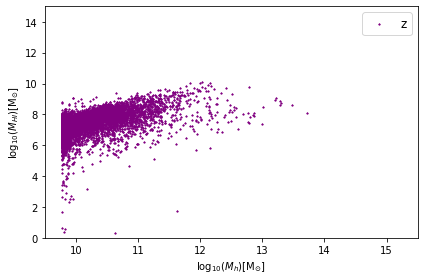

In [3]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = Mvir
y = HIMass
plot = ax.scatter(x, y, color= "purple", marker= "*", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend(label_z,
           loc='upper right',
           ncol=5,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir")
plt.savefig("plots/" + name_of_plot + ".pdf")

"\noccurrences_cen = np.count_nonzero(Type == 0)\noccurrences_sat = np.count_nonzero(Type == 1)\noccurrences_all = np.count_nonzero(gals)\nprint('Num Centrals = ', occurrences_cen)\nprint('Num Satellites = ', occurrences_sat)\nprint('Num All = ', occurrences_all)\n"

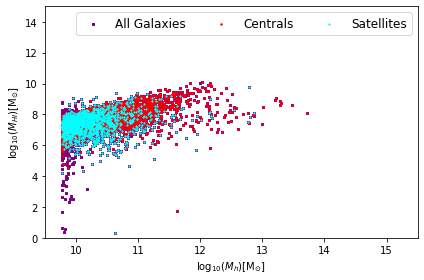

In [4]:
# Now plot the simulation for Cen, Sat and All and the Zwaan 2005 and Martin 2010 dataset on one fig
fig, ax = plt.subplots(1, 1)

label_z = ("z = " + str(redshift_used))
x = Mvir
y = HIMass
all_plt = ax.scatter(x, y, color= "purple", marker= "s", s=2)  
centrals_plt = ax.scatter(x[Type==0], y[Type==0], color= "red", marker= "o", s=2)  
satellites_plt = ax.scatter(x[Type==1], y[Type==1], color= "cyan", marker= "*", s=2)  

ax.set_xlabel(r"$\log_{10}(M_{h}) [{\rm M_{\odot}}]$")
ax.set_ylabel(r"$\log_{10}(M_{HI}) [{\rm M_{\odot}}]$")
ax.set_ylim([0,15])
ax.set_xlim([9.5,15.5])
# Add the legend
plt.legend((all_plt, centrals_plt, satellites_plt),
           ('All Galaxies', 'Centrals', 'Satellites'),
           scatterpoints=1,
           loc='upper right',
           ncol=3,
           fontsize=12)

# Finally save the figure as a PDF
plt.tight_layout()

name_of_plot=("Alice_MHI_Mvir_CenSatAll")
plt.savefig("plots/" + name_of_plot + ".pdf")
'''
occurrences_cen = np.count_nonzero(Type == 0)
occurrences_sat = np.count_nonzero(Type == 1)
occurrences_all = np.count_nonzero(gals)
print('Num Centrals = ', occurrences_cen)
print('Num Satellites = ', occurrences_sat)
print('Num All = ', occurrences_all)
'''